# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


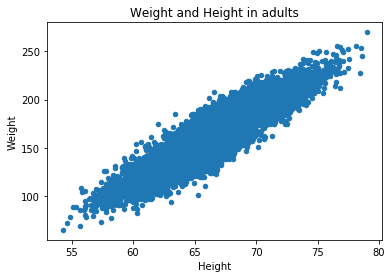

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

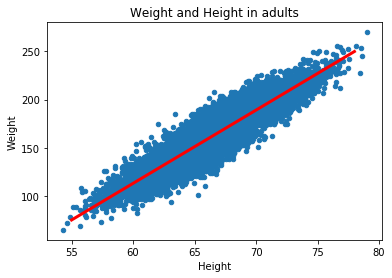

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

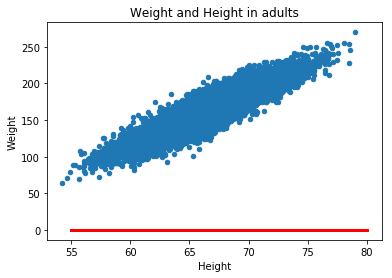

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [20]:
yhat = line(x, w=2, b=0)

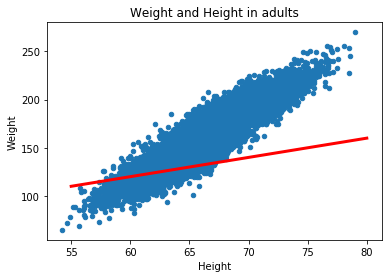

In [21]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

Text(0.5, 0, 'b')

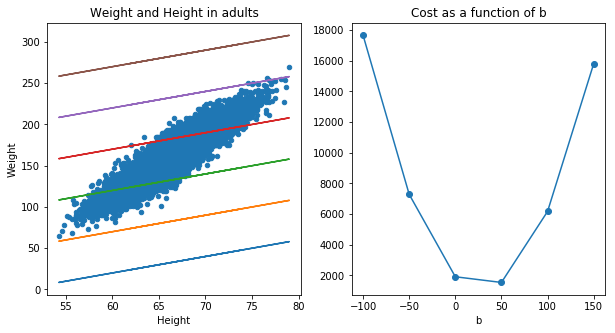

In [19]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [23]:
model = Sequential()

In [24]:
model.add(Dense(1, input_shape=(1,)))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [27]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 46us/step - loss: 897.1421
Epoch 2/40
10000/10000 [==============================] - 0s 21us/step - loss: 561.1337
Epoch 3/40
10000/10000 [==============================] - 0s 16us/step - loss: 509.9302
Epoch 4/40
10000/10000 [==============================] - 0s 18us/step - loss: 491.4140
Epoch 5/40
10000/10000 [==============================] - 0s 19us/step - loss: 419.8550
Epoch 6/40
10000/10000 [==============================] - 0s 18us/step - loss: 389.5093
Epoch 7/40
10000/10000 [==============================] - 0s 21us/step - loss: 346.5767
Epoch 8/40
10000/10000 [==============================] - 0s 19us/step - loss: 311.4210
Epoch 9/40
10000/10000 [==============================] - 0s 15us/step - loss: 296.9047
Epoch 10/40
10000/10000 [==============================] - 0s 17us/step - loss: 260.0092
Epoch 11/40
10000/10000 [==============================] - 0s 16us/step - loss: 237.7863
Epoch 12/40
10000/10000 [=====

In [28]:
y_pred = model.predict(X)

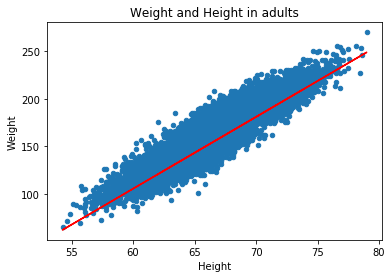

In [29]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [30]:
W, B = model.get_weights()

In [31]:
W

array([[7.560499]], dtype=float32)

In [32]:
B

array([-348.37927], dtype=float32)

## Evaluating Model Performance

In [33]:
from sklearn.metrics import r2_score

In [34]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.792


### Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [37]:
len(X_train)

8000

In [38]:
len(X_test)

2000

In [39]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [40]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [41]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	172.8
The Mean Squared Error on the Test set is:	168.4


In [44]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.833
The R2 score on the Test set is:	0.834


# Classification

In [45]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [46]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


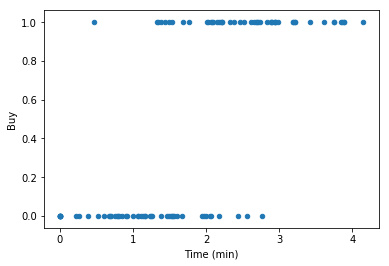

In [47]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [48]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [49]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [51]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.6348 - acc: 0.5800
Epoch 2/25
100/100 [==============================] - 0s 101us/step - loss: 0.5830 - acc: 0.7700
Epoch 3/25
100/100 [==============================] - 0s 62us/step - loss: 0.5572 - acc: 0.6700
Epoch 4/25
100/100 [==============================] - 0s 68us/step - loss: 0.5357 - acc: 0.7800
Epoch 5/25
100/100 [==============================] - 0s 72us/step - loss: 0.5245 - acc: 0.7900
Epoch 6/25
100/100 [==============================] - 0s 80us/step - loss: 0.5207 - acc: 0.7900
Epoch 7/25
100/100 [==============================] - 0s 75us/step - loss: 0.4818 - acc: 0.7800
Epoch 8/25
100/100 [==============================] - 0s 55us/step - loss: 0.4767 - acc: 0.7700
Epoch 9/25
100/100 [==============================] - 0s 51us/step - loss: 0.4534 - acc: 0.8200
Epoch 10/25
100/100 [==============================] - 0s 52us/step - loss: 0.4481 - acc: 0.8200
Epoch 11/25
100/100 [==================

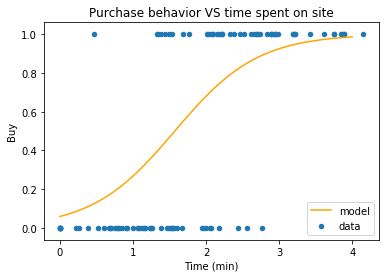

In [52]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [53]:
temp_class = model.predict(temp) > 0.5

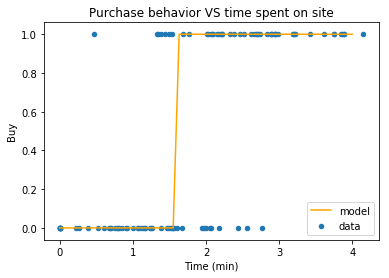

In [54]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [55]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


### Train/Test split


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [61]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [62]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [63]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.825
The test accuracy score is 0.850


## Cross Validation

In [64]:
from keras.wrappers.scikit_learn import KerasClassifier

In [65]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [66]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [67]:
from sklearn.model_selection import cross_val_score, KFold

In [68]:
cv = KFold(3, shuffle=True)

In [69]:
scores = cross_val_score(model, X, y, cv=cv)

In [70]:
scores

array([0.88235294, 0.81818182, 0.78787879])

In [71]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8295 ± 0.0394


## Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y, y_class_pred)

array([[39, 11],
       [ 7, 43]])

In [74]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [75]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,39,11
Buy,7,43


In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [77]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.796
Recall:  	0.860
F1 Score:	0.827


In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        50
           1       0.80      0.86      0.83        50

   micro avg       0.82      0.82      0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



## Feature Preprocessing

### Categorical Features

In [80]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [81]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [82]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [83]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [84]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [85]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [86]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


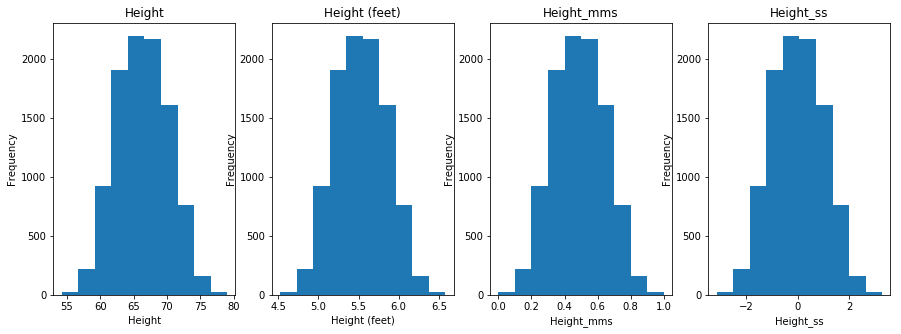

In [87]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [172]:
df = pd.read_csv("../data/housing-data.csv")

In [173]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


In [175]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


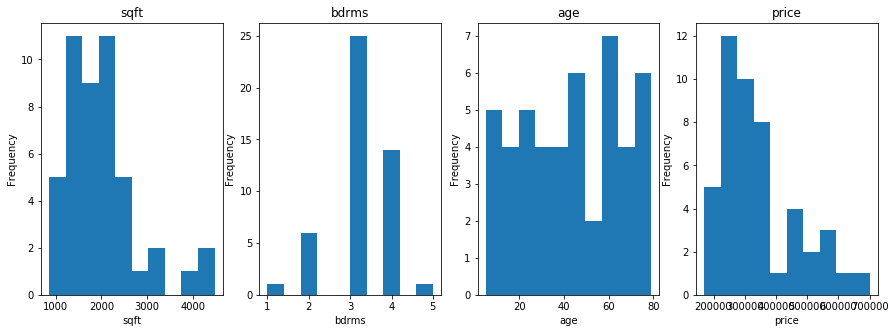

In [176]:
# plot the histograms for each feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [177]:
X = df[["sqft", "bdrms", "age"]].values
y = df[["price"]].values

In [178]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.compile(optimizer=Adam(lr=0.8), 
             loss="mean_squared_error",
             metrics=["accuracy"])

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [182]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
37/37 [==============================] - 0s 10ms/step - loss: 142937526604.1081 - acc: 0.0000e+00
Epoch 2/100
37/37 [==============================] - 0s 78us/step - loss: 140385779712.0000 - acc: 0.0000e+00
Epoch 3/100
37/37 [==============================] - 0s 57us/step - loss: 137821859507.8919 - acc: 0.0000e+00
Epoch 4/100
37/37 [==============================] - 0s 63us/step - loss: 135226277666.5946 - acc: 0.0000e+00
Epoch 5/100
37/37 [==============================] - 0s 55us/step - loss: 132715166858.3784 - acc: 0.0000e+00
Epoch 6/100
37/37 [==============================] - 0s 58us/step - loss: 130252769003.2432 - acc: 0.0000e+00
Epoch 7/100
37/37 [==============================] - 0s 64us/step - loss: 127626311513.9459 - acc: 0.0000e+00
Epoch 8/100
37/37 [==============================] - 0s 60us/step - loss: 125252320394.3784 - acc: 0.0000e+00
Epoch 9/100
37/37 [==============================] - 0s 62us/step - loss: 122837911718.0541 - acc: 0.0000e+00
Epoch 10/1

37/37 [==============================] - 0s 61us/step - loss: 27501171075.4595 - acc: 0.0000e+00
Epoch 76/100
37/37 [==============================] - 0s 55us/step - loss: 26853967595.2432 - acc: 0.0000e+00
Epoch 77/100
37/37 [==============================] - 0s 64us/step - loss: 26182420701.4054 - acc: 0.0000e+00
Epoch 78/100
37/37 [==============================] - 0s 78us/step - loss: 25540950956.9730 - acc: 0.0000e+00
Epoch 79/100
37/37 [==============================] - 0s 54us/step - loss: 24919161551.5676 - acc: 0.0000e+00
Epoch 80/100
37/37 [==============================] - 0s 65us/step - loss: 24293999532.9730 - acc: 0.0000e+00
Epoch 81/100
37/37 [==============================] - 0s 70us/step - loss: 23710217299.0270 - acc: 0.0000e+00
Epoch 82/100
37/37 [==============================] - 0s 73us/step - loss: 23114452549.1892 - acc: 0.0000e+00
Epoch 83/100
37/37 [==============================] - 0s 70us/step - loss: 22564489741.8378 - acc: 0.0000e+00
Epoch 84/100
37/37 [===

In [183]:
from sklearn.metrics import r2_score

In [184]:
# check the R2score on training and test set (probably very bad)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.119
The R2 score on the Test set is:	-1.113


# Feature normalisation

In [185]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['sqft_ss'] = ss.fit_transform(df[['sqft']])
df['age_ss'] = ss.fit_transform(df[['age']])

/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [186]:
df["age_base_10"] = df["age"]/10
df["price_100k"] = df["price"]/100000
df["sqft_1000ft"] = df["sqft"]/1000

In [187]:
df.describe()

,sqft,bdrms,age,price,sqft_ss,age_ss,age_base_10,price_100k,sqft_1000ft
count,47.000000,47.000000,47.000000,47.000000,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574,9.448707e-18,1.606280e-16,4.274468,3.404127,2.000681
std,794.702354,0.760982,22.873440,125039.899586,1.010811e+00,1.010811e+00,2.287344,1.250399,0.794702
min,852.000000,1.000000,5.000000,169900.000000,-1.461049e+00,-1.667993e+00,0.500000,1.699000,0.852000
25%,1432.000000,3.000000,24.500000,249900.000000,-7.233261e-01,-8.062594e-01,2.450000,2.499000,1.432000
50%,1888.000000,3.000000,44.000000,299900.000000,-1.433229e-01,5.547441e-02,4.400000,2.999000,1.888000
75%,2269.000000,4.000000,61.500000,384450.000000,3.412850e-01,8.288253e-01,6.150000,3.844500,2.269000
max,4478.000000,5.000000,79.000000,699900.000000,3.150993e+00,1.602176e+00,7.900000,6.999000,4.478000


In [188]:
X = df[["sqft_1000ft", "bdrms", "age_base_10"]].values
y = df[["price_100k"]].values

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [192]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.2), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 0s 8ms/step - loss: 2.7637
Epoch 2/20
37/37 [==============================] - 0s 74us/step - loss: 2.4351
Epoch 3/20
37/37 [==============================] - 0s 72us/step - loss: 2.7019
Epoch 4/20
37/37 [==============================] - 0s 65us/step - loss: 1.5044
Epoch 5/20
37/37 [==============================] - 0s 71us/step - loss: 1.2117
Epoch 6/20
37/37 [==============================] - 0s 62us/step - loss: 1.6671
Epoch 7/20
37/37 [==============================] - 0s 67us/step - loss: 0.6445
Epoch 8/20
37/37 [==============================] - 0s 66us/step - loss: 1.5599
Epoch 9/20
37/37 [==============================] - 0s 61us/step - loss: 2.1956
Epoch 10/20
37/37 [==============================] - 0s 52us/step - loss: 0.9581
Epoch 11/20
37/37 [==============================] - 0s 53us/step - loss: 1.3105
Epoch 12/20
37/37 [==============================] - 0s 49us/step - loss: 1.5917
Epoch 13/20
37/37 [===================

In [193]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.636
The R2 score on the Test set is:	0.629


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [230]:
df = pd.read_csv("../data/HR_comma_sep.csv")

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [232]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [233]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [234]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [235]:
# If we predicted that everyone stayed it would get an accuracy of 
11428/15000

0.7618666666666667

In [236]:
# This is an unbalanced dataset so the train test split would need to be stratified to represent the distribution of left

In [237]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

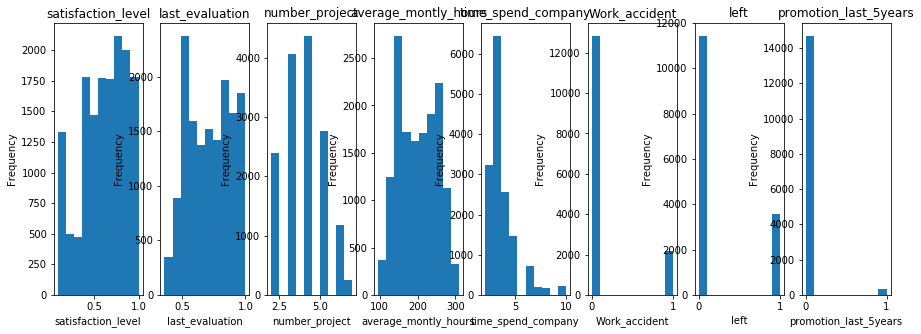

In [238]:
# plot the histograms for each feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_columns):
    plt.subplot(1, 8, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [240]:
# Just need to normalise the average_monthly hours as everything else in a reasonable interval

In [241]:
df["average_montly_hours_100"] = df["average_montly_hours"] / 100

In [242]:
# The categorical variables are sales and salary
df["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [243]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [244]:
one_hot_variables = pd.get_dummies(df[["sales", "salary"]])
#one_hot_variables

In [250]:
# combine the one hot encoded variables with the original dataframe 
ml_df = pd.concat([df, one_hot_variables], axis=1)

In [252]:
# drop the superfluous categorical variables
ml_df = ml_df.drop(["sales", "salary"], axis = 1) 

In [253]:
list(ml_df)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'average_montly_hours_100',
 'sales_IT',
 'sales_RandD',
 'sales_accounting',
 'sales_hr',
 'sales_management',
 'sales_marketing',
 'sales_product_mng',
 'sales_sales',
 'sales_support',
 'sales_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [292]:
X = ml_df.drop(["left", "average_montly_hours"], axis=1).values

In [293]:
y = ml_df["left"].values

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [295]:
# Check the distribution of y_test and y_train
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 9142]
 [   1 2857]]


In [296]:
unique, counts = np.unique(y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 2286]
 [   1  714]]


In [297]:
# The distribution in y has been maintained across the train and test sets so that we don't get a biased classifier

In [299]:
model = Sequential()
model.add(Dense(1, input_shape=(20,), activation="sigmoid"))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
11999/11999 [==============================] - 2s 137us/step - loss: 0.5493 - acc: 0.7547
Epoch 2/20
11999/11999 [==============================] - 1s 62us/step - loss: 0.5606 - acc: 0.7630
Epoch 3/20
11999/11999 [==============================] - 1s 70us/step - loss: 0.5277 - acc: 0.7664
Epoch 4/20
11999/11999 [==============================] - 1s 74us/step - loss: 0.5374 - acc: 0.7672
Epoch 5/20
11999/11999 [==============================] - 1s 76us/step - loss: 0.5700 - acc: 0.7622
Epoch 6/20
11999/11999 [==============================] - 1s 79us/step - loss: 0.5446 - acc: 0.7631
Epoch 7/20
11999/11999 [==============================] - 1s 80us/step - loss: 0.5576 - acc: 0.7611
Epoch 8/20
11999/11999 [==============================] - 1s 77us/step - loss: 0.5566 - acc: 0.7616
Epoch 9/20
11999/11999 [==============================] - 1s 89us/step - loss: 0.5353 - acc: 0.7671
Epoch 10/20
11999/11999 [==============================] - 1s 92us/step - loss: 0.5153 - acc: 0.767

In [300]:
y_test_pred = model.predict_classes(X_test)

In [301]:
pretty_confusion_matrix(y_test, y_test_pred, labels=["Stay", "Leave"])

,Predicted Stay,Predicted Leave
Stay,2220,66
Leave,596,118


In [302]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2286
           1       0.64      0.17      0.26       714

   micro avg       0.78      0.78      0.78      3000
   macro avg       0.71      0.57      0.57      3000
weighted avg       0.75      0.78      0.73      3000



# Cross validation

In [303]:
from keras.wrappers.scikit_learn import KerasClassifier

In [305]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(20,), activation="sigmoid"))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=["accuracy"])
    return model

In [306]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [309]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

In [311]:
print(f"The cross validation accurays is {scores.mean()} +/- {scores.std()}")

The cross validation accurays is 0.7812518172773929 +/- 0.015496305204494595


In [312]:
scores

array([0.75333333, 0.78533333, 0.79433333, 0.796     , 0.77725909])

# This is no different to the baseline of just guessing they all stay so a linear regression model isn't able to capture the complexities of the relationships